In [1]:
import pandas as pd
%matplotlib inline
import numpy as np

In [2]:
from pathlib import Path
csvpath = Path('../10.2/Resources/amazon.csv')
df = pd.read_csv(csvpath, parse_dates=True, index_col='Date')

In [3]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2002-01-02,10.93,11.00,10.48,10.96,10.96,6519600
2002-01-03,11.13,11.94,11.05,11.90,11.90,10875700
2002-01-04,12.02,12.40,11.95,12.25,12.25,12687300
2002-01-07,12.08,12.51,12.08,12.34,12.34,12182900
2002-01-08,12.27,12.32,11.75,11.85,11.85,6041100


<AxesSubplot:xlabel='Date'>

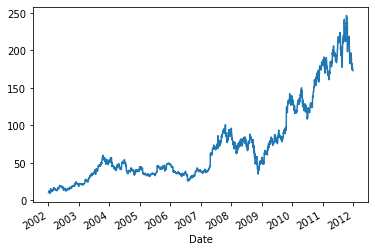

In [4]:
df.Close.plot()

In [5]:
# Apply the Augmented Dickey-Fuller test to determine if the above is stationary
from statsmodels.tsa.stattools import adfuller
adfuller(df.Close)

(-0.5231558168182614,
 0.887418036279288,
 2,
 2516,
 {'1%': -3.4329517425474014,
  '5%': -2.862689439250822,
  '10%': -2.5673818904827863},
 11381.770608188392)

# Non-Stationary to Stationary Techniques

### Technique 1: Applying a Percent Change

In [6]:
# Convert to stationary data by taking the `pct_change` of the Closing prices.
df['Returns'] = df.Close.pct_change()

In [7]:
# Drop the NaNs created by the pct_change function
df = df.dropna()

<AxesSubplot:xlabel='Date'>

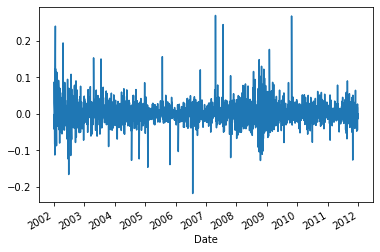

In [8]:
# Plot the returns as a line chart. 
# You should no longer see the upward trend in the data
df.Returns.plot()

### Technique 2: Applying a Diff

In [9]:
# Subtract the upward trend for the closing prices using the `diff()` function
df['Diff'] = df.Close.diff()

In [10]:
# Drop the NaNs created from the diff function
df = df.dropna()

<AxesSubplot:xlabel='Date'>

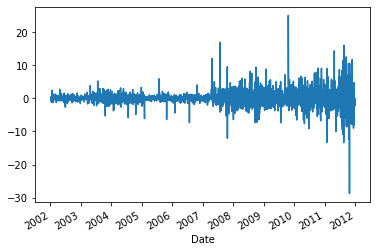

In [11]:
# Plot the 
df.Diff.plot()